In [2]:
import numpy as np
import matplotlib.image as mpimg

import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [3]:
image = mpimg.imread("../images/wa_state_highway.jpg")

In [7]:
print(image.shape)

print(type(image))

(3088, 4700, 3)
<class 'numpy.ndarray'>


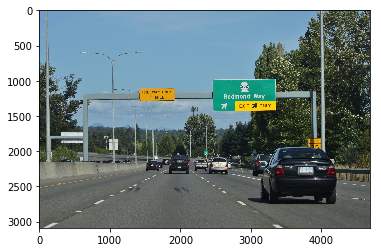

In [8]:
plt.imshow(image)

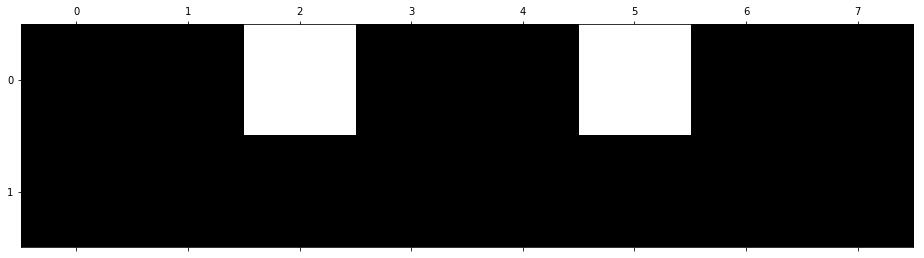

In [11]:
smile_image = np.array([[0, 0, 255, 0, 0, 255, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0]])
plt.matshow(smile_image, cmap='gray')

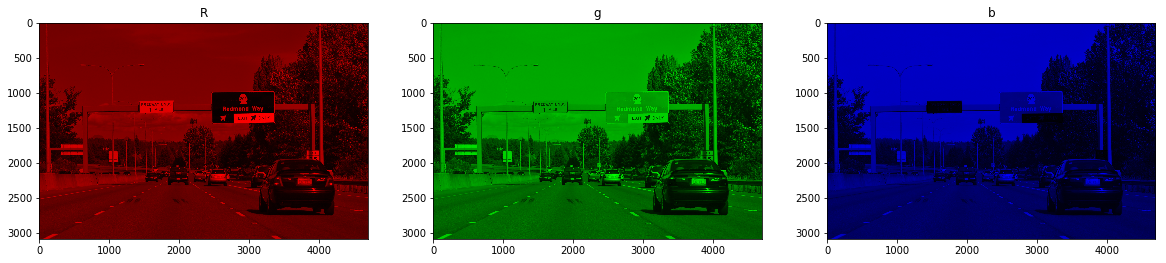

In [90]:
r = image[:, :, 0:1]
g = image[:, :, 1:2]
b = image[:, :, 2:3]
zeros = np.zeros_like(image)[:, :, :2]
r, g, b = map(lambda x: np.concatenate((x, zeros), axis=2), [r, g, b])
for i, x in enumerate([r, g, b]):
    x[:, :, [0, i]]= x[:, :, (i, 0)]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
ax1.set_title('R')
ax1.imshow(r)
ax2.set_title('g')
ax2.imshow(g)
ax3.set_title('b')
ax3.imshow(b)

In [94]:
np.min(r[:, :, 0])
np.max(r[:, :, 0])

255

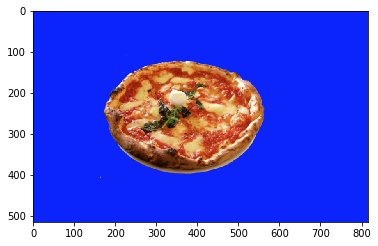

In [95]:
image = cv2.imread('../images/pizza_bluescreen.jpg')
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

In [122]:
print(image.shape)

(514, 816, 3)


In [119]:
lower_blue = np.array([0, 0, 200])
upper_blue = np.array([50, 70, 255])

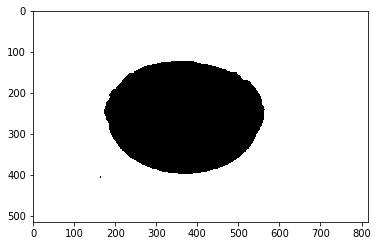

In [120]:
mask = cv2.inRange(image_copy, lower_blue, upper_blue)
plt.imshow(mask, cmap='gray')

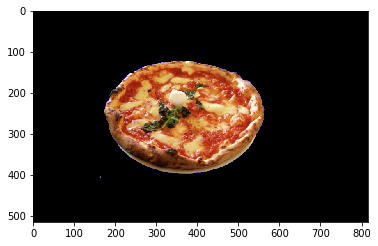

In [121]:
masked_image = np.copy(image_copy)
masked_image[mask != 0] = [0, 0, 0]
plt.imshow(masked_image)

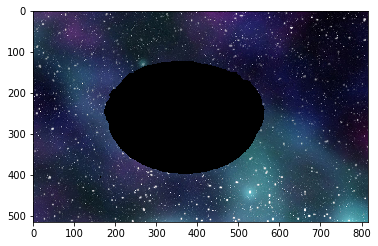

In [126]:
backgroud_image = cv2.imread('../images/space_background.jpg')
backgroud_image = cv2.cvtColor(backgroud_image, cv2.COLOR_BGR2RGB)
back_image = np.copy(backgroud_image)
back_image = back_image[:514, :816]

back_image[mask == 0] = [0, 0, 0]

plt.imshow(back_image)

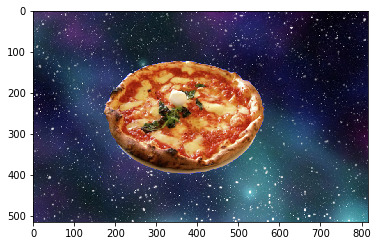

In [127]:
new_pizza = back_image + masked_image
plt.imshow(new_pizza)